# Inter/intra observer variations

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import re

In [2]:
root = r'C:\Users\johamuel\Documents\BiAPoL\Shared\BiAPoLprojects\64_radiographic_workflow\Registration_user_study'

In [3]:
animals = os.listdir(root)
animals

['P1_H_B6_M52',
 'P1_H_B6_M57',
 'P1_H_B6_M61',
 'P1_H_C3H_M46',
 'P1_H_C3H_M48',
 'P1_H_C3H_M54',
 'P1_H_C3H_M58',
 'P2E_M11',
 'P2E_M14',
 'P2E_M2']

Let's write a function that helps us to parse the report file

In [4]:
def get_info(report_file: str):
    
    info = {}
    with open(report_file, 'rt') as file:
        for line in file:
            if 'Isocenter coordinates' in line:
                vals = re.findall(r'\d+\.\d+', line)
                info['isocenter_coords_x'] = vals[0]
                info['isocenter_coords_y'] = vals[1]
                
            if 'Target coordinates (radiography)' in line:
                vals = re.findall(r'\d+', line)
                info['target_coords_rg_x'] = vals[0]
                info['target_coords_rg_y'] = vals[1]
                
            if 'Target coordinates (plan)' in line:
                vals = re.findall(r'\d+', line)
                info['target_coords_xr_x'] = vals[0]
                info['target_coords_xr_y'] = vals[1]
                
            if 'Transformation parameters' in line:
                _line = line.split(':')[-1]
                val1 = re.findall(r'\d+\.\d+', _line)
                val2 = re.findall(r'\d+', ' '.join(_line.split(',')[-2:]))
                vals = val1 + val2
                info['trafo_r'] = vals[0]
                info['trafo_angle'] = vals[1]
                info['trafo_x'] = vals[1]
                info['trafo_y'] = vals[2]
                
            if 'Motor origin' in line:
                vals = re.findall(r'\d+\.\d+', line)
                info['motor_origin_x'] = vals[0]
                info['motor_origin_y'] = vals[1]
                
            if 'Motor destination' in line:
                vals = re.findall(r'\d+\.\d+', line)
                info['motor_dest_x'] = vals[0]
                info['motor_dest_y'] = vals[1]
        
        for key in info.keys():
            info[key] = float(info[key])
            
               
    return info

In [5]:
results = []
for animal in animals:
    for study in os.listdir(os.path.join(root, animal)):
        observer = study.split('_')[1]
        
        
        report_file = os.path.join(root, animal, study, 'report.txt')
        info = get_info(report_file)
        info['observer'] = observer
        info['animal'] = animal
        
        results.append(info)

These are the accumulated results:

In [38]:
df = pd.DataFrame(results)
df['observer'] = 'Observer ' + pd.Series(pd.factorize(df['observer'])[0] + 1).astype(str)
df

,isocenter_coords_x,isocenter_coords_y,target_coords_xr_x,target_coords_xr_y,target_coords_rg_x,target_coords_rg_y,trafo_r,trafo_angle,trafo_x,trafo_y,motor_origin_x,motor_origin_y,motor_dest_x,motor_dest_y,observer,animal
0,458.4,398.5,89.0,374.0,494.0,282.0,2.02,1.4,1.4,334.0,35.0,20.0,33.20,25.81,Observer 1,P1_H_B6_M52
1,458.5,398.5,94.0,376.0,492.0,283.0,2.04,5.2,5.2,371.0,35.0,20.0,33.32,25.76,Observer 2,P1_H_B6_M52
2,458.5,398.5,94.0,376.0,496.0,294.0,2.01,3.4,3.4,352.0,35.0,20.0,33.15,25.23,Observer 2,P1_H_B6_M52
3,458.5,398.5,94.0,375.0,500.0,290.0,2.03,1.9,1.9,334.0,35.0,20.0,32.90,25.45,Observer 2,P1_H_B6_M52
4,458.4,398.6,93.0,375.0,498.0,283.0,2.04,3.5,3.5,355.0,35.0,20.0,33.00,25.77,Observer 3,P1_H_B6_M52
5,468.0,398.5,82.0,361.0,524.0,261.0,2.18,3.7,3.7,295.0,35.0,20.0,32.22,26.90,Observer 1,P1_H_B6_M57
6,468.0,398.5,85.0,363.0,535.0,266.0,2.08,1.9,1.9,332.0,35.0,20.0,31.67,26.62,Observer 2,P1_H_B6_M57
7,468.0,398.5,83.0,365.0,528.0,269.0,2.08,0.0,0.0,355.0,35.0,20.0,32.02,26.50,Observer 3,P1_H_B6_M57
8,467.9,398.5,82.0,364.0,528.0,265.0,2.04,1.7,1.7,383.0,35.0,20.0,31.99,26.69,Observer 3,P1_H_B6_M57
9,468.0,398.5,85.0,366.0,538.0,272.0,1.95,0.5,0.5,378.0,35.0,20.0,31.51,26.34,Observer 3,P1_H_B6_M57


In order to better compare large/small deviations between animals, we normalize all measurement values to their common mean:

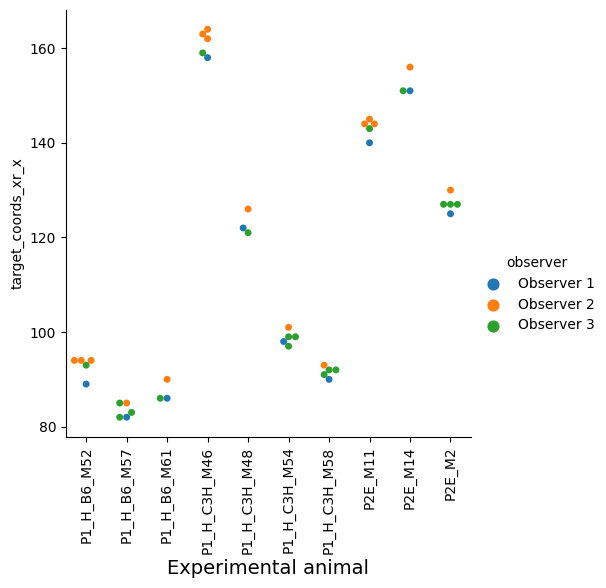

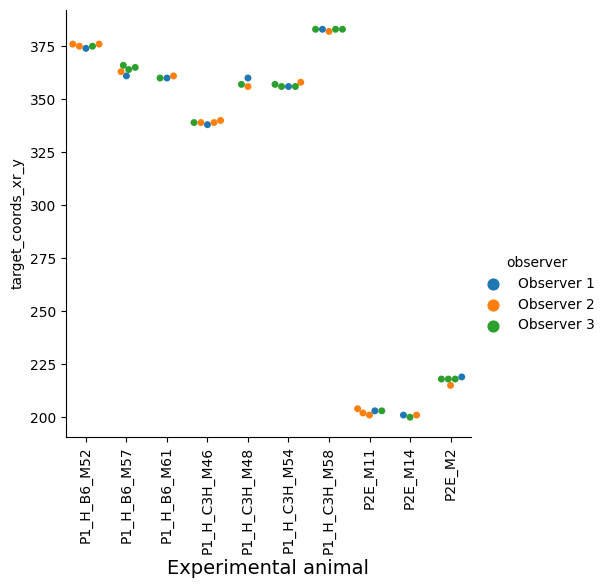

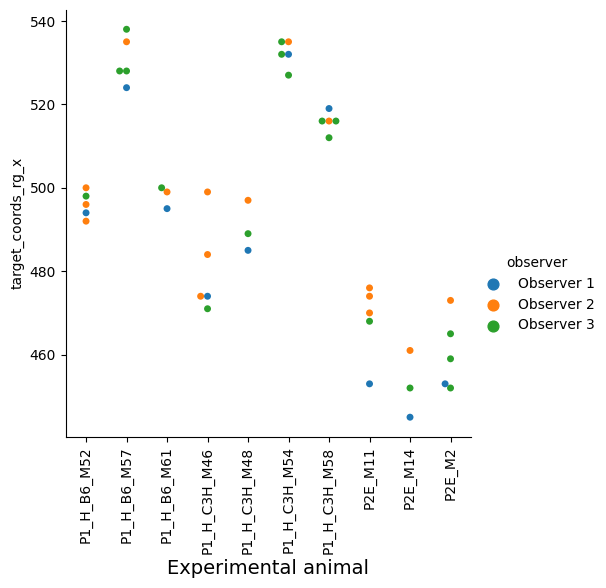

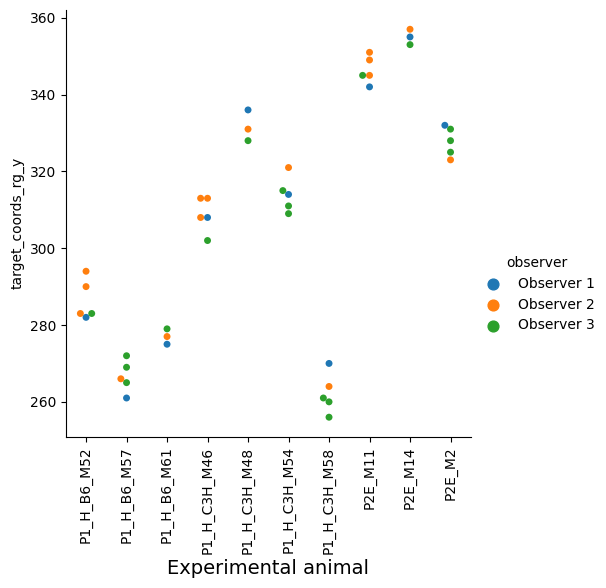

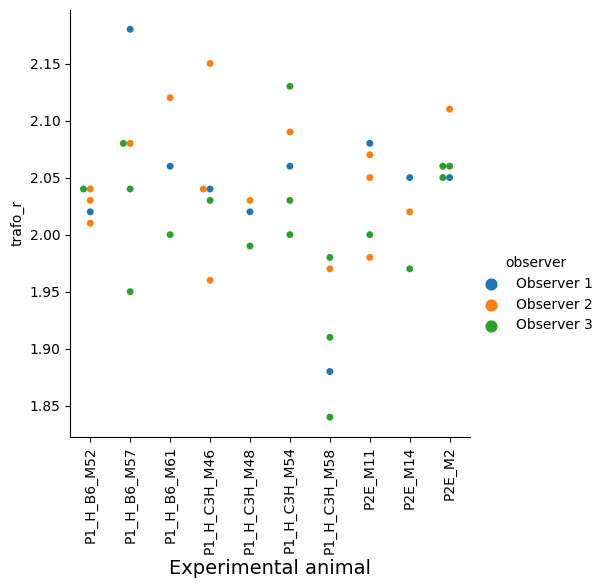

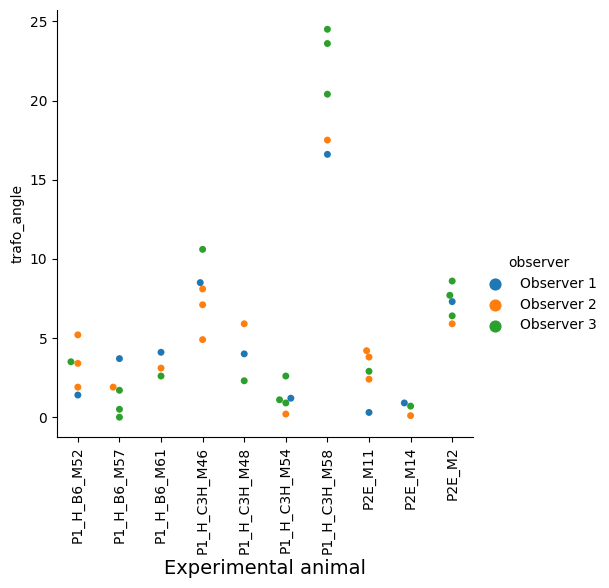

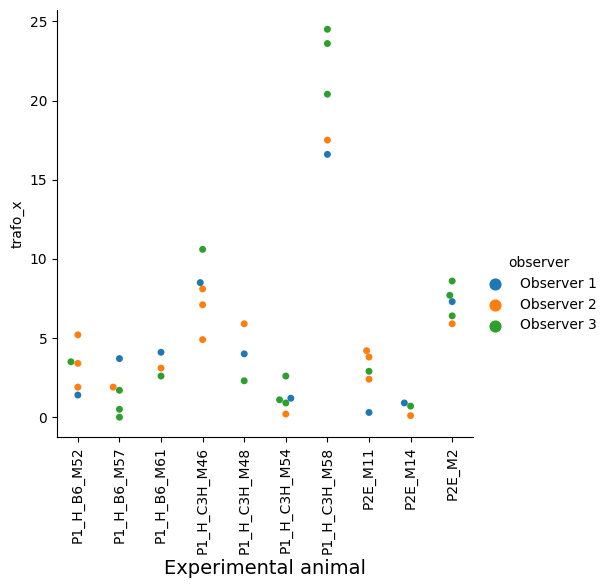

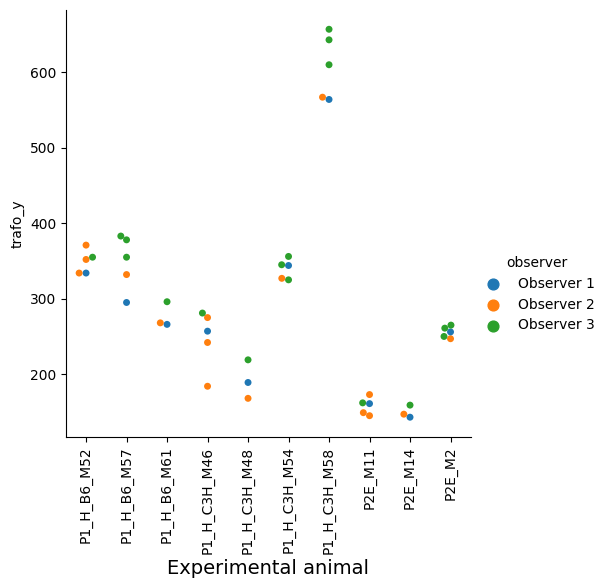

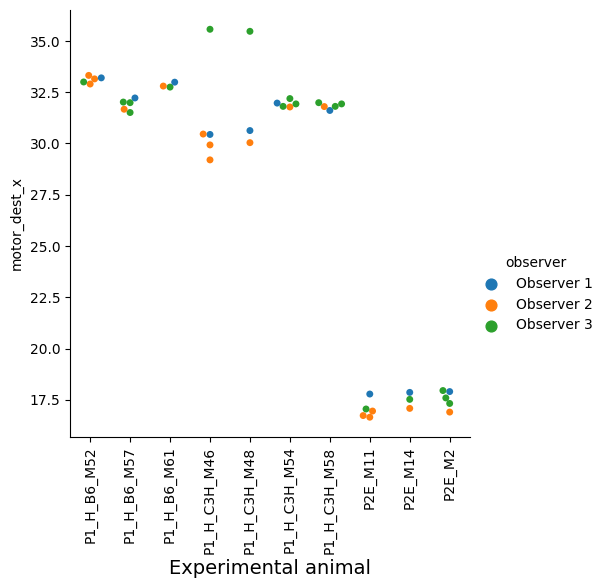

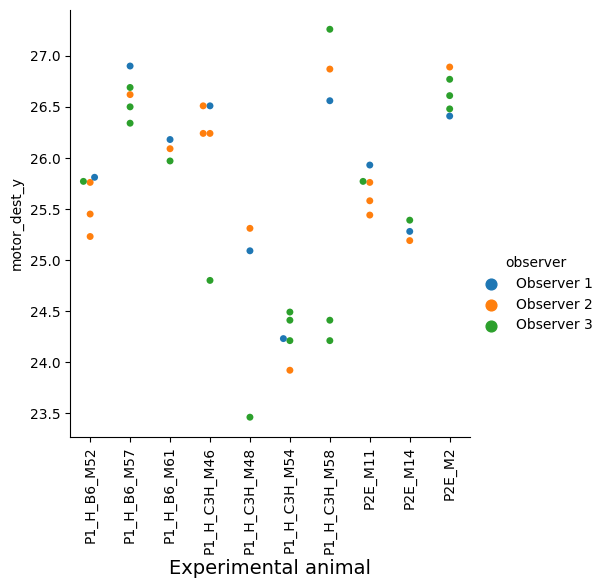

In [41]:
measurement_items = list(df.columns)
measurement_items.remove('animal')
measurement_items.remove('observer')
measurement_items.remove('motor_origin_x')
measurement_items.remove('motor_origin_y')
measurement_items.remove('isocenter_coords_x')
measurement_items.remove('isocenter_coords_y')

for key in measurement_items:
    g = sns.catplot(data=df, x='animal', y=key, hue='observer', kind='swarm')
    g.set_xticklabels(rotation=90)
    #g.set_ylabels('transformation angle [°]', fontsize=14)
    g.set_xlabels('Experimental animal', fontsize=14)

In [32]:
list(df.columns).remove('animal')

## Intra-obser variation

For this analysis, we iterate over all registered animals and look for occurrences of the same observer registering the same animals more than once.

In [8]:
observers = df['observer'].unique()
animals = df['animal'].unique()